# Pedestrian

In [1]:
%matplotlib inline
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
import os
import time
import math
import matplotlib.pyplot as plt

In [2]:
# plot setting
rows = 6
columns = 6
plt.rcParams['figure.figsize'] = (9.0, 9.0)
figsize = (8, 8)

###### Sample Image

Image Shape (350, 600, 3)


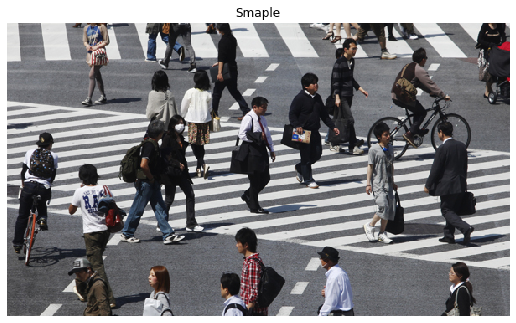

In [3]:
# Show sample Image
sample_img = cv2.imread("Ped.jpg") # channel = bgr
rgb_img = cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB) # channel = rgb

# Image Property
plt.title("Smaple")
plt.axis("off")
plt.imshow(rgb_img)
print("Image Shape",rgb_img.shape)

###### Load model and set Params 

In [4]:
# Read in Model
pednet = cv2.dnn.readNet("models/person-detection-retail-0013.bin","models/person-detection-retail-0013.xml")

#backends = (cv.dnn.DNN_BACKEND_DEFAULT, cv.dnn.DNN_BACKEND_HALIDE, cv.dnn.DNN_BACKEND_INFERENCE_ENGINE, cv.dnn.DNN_BACKEND_OPENCV)
pednet.setPreferableBackend(cv2.dnn.DNN_BACKEND_INFERENCE_ENGINE)

#targets = (cv.dnn.DNN_TARGET_CPU, cv.dnn.DNN_TARGET_OPENCL, cv.dnn.DNN_TARGET_OPENCL_FP16, cv.dnn.DNN_TARGET_MYRIAD)
pednet.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

###### BlobFromImage
Creates 4-dimensional blob from image. Optionally resizes and crops image from center, <br>
subtract mean values, scales values by scalefactor, swap Blue and Red channels.

In [5]:
# Creates 4-dimensional blob from image. Optionally resizes and crops image from center, 
# subtract mean values, scales values by scalefactor, swap Blue and Red channels.
start = time.time()

blob = cv2.dnn.blobFromImage(sample_img,size = (300,300)) # Make sure to chceck model's trained image size
pednet.setInput(blob)

# The net outputs blob with shape: [1, 1, N, 7], where N is the number of detected bounding boxes.
out = pednet.forward() 

counts = 0
for detection in out.reshape(-1, 7):
    confidence = float(detection[2])
    xmin = int(detection[3] * sample_img.shape[1])
    ymin = int(detection[4] * sample_img.shape[0])
    xmax = int(detection[5] * sample_img.shape[1])
    ymax = int(detection[6] * sample_img.shape[0])
    
    if confidence > 0.4:
        cv2.rectangle(sample_img, (xmin, ymin), (xmax, ymax), color=(0, 255, 0), thickness = 2)
        counts +=1
        
end = time.time()

print(end-start)

0.7035989761352539


Image Shape (350, 600, 3)


True

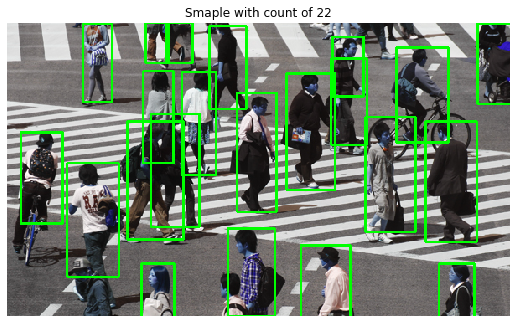

In [6]:
# Image Property
plt.title("Smaple with count of {}".format(counts))
plt.axis("off")
plt.imshow(sample_img)
print("Image Shape",sample_img.shape)
cv2.imwrite("bbox.jpg",sample_img)

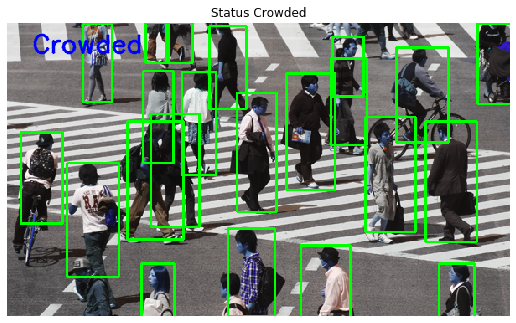

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX

if counts > 10:
    cv2.putText(sample_img,text='Crowded',org=(int(rgb_img.shape[1]*0.05),int(rgb_img.shape[0]*0.1)), 
                fontFace=font,fontScale= 1,color=(0,0,255),thickness=2,lineType=cv2.LINE_AA)
    plt.title("Status Crowded")
    plt.axis("Off")
    plt.imshow(sample_img)
    cv2.imwrite("crowded.jpg",sample_img)
else:
    cv2.putText(sample_img,text='Normal',org=(int(rgb_img.shape[1]*0.05),int(rgb_img.shape[0]*0.1)), 
                fontFace=font,fontScale= 3,color=(0,0,255),thickness=5,lineType=cv2.LINE_AA)
    plt.title("Status Normal")
    plt.axis("Off")
    plt.imshow(sample_img)
    cv2.imwrite("normal.jpg",sample_img)
    